In [97]:
from DataLoader import *
import torch
import torch.nn as nn
import pdb
import skimage
from skimage.viewer import ImageViewer
from skimage import filters
from matplotlib import pyplot as plt

In [129]:
data_dir = "/serverdata/akshay/personal_projects/let_it_flow/training/image_2/"
dataset = KITTIDataset(folder_name=data_dir,
transform=transforms.Compose([
#     RandomVerticalFlip(),
#     RandomHorizontalFlip(),
#     RandomCrop([370, 1224]),
    RandomCrop([320, 896]),
    
#     Normalize(),
    ToTensor()
]
), diff_frames=3
)
#370 , 1224

dataloader = DataLoader(dataset, batch_size = 4, shuffle = True, num_workers = 4)


In [130]:
def sample_batch(batch_size=1):
    sampled_data = []
    for i_batch, sampled_batch in enumerate(dataloader):
        if(i_batch==batch_size):
            break
        sampled_batch = sampled_batch.numpy()
#         diff_img = np.abs(sampled_batch[:,0:1] - sampled_batch[:,1:2])
#         diff_mask = diff_img<=mask_thershold
#         diff_img = np.multiply(diff_mask, diff_img)
#         sampled_batch = np.concatenate((sampled_batch, diff_img), axis=1)
        sampled_data.extend(sampled_batch)

    sampled_data = np.stack(sampled_data,axis=0)
    print("sampled_data ", sampled_data.shape)
    return sampled_data


In [131]:
def add_masked_diff(img_batch, mask_threshold=100):
    diff_img = np.abs(img_batch[:,0:1] - img_batch[:,1:2])
    diff_mask = diff_img>=mask_threshold
    diff_img = np.multiply(diff_mask, diff_img)
    img_batch = np.concatenate((img_batch, diff_img), axis=1)
    return img_batch
    

In [132]:
def show_imgs(image_batch):
    batch_size = image_batch.shape[0]
    num_per_batch = image_batch.shape[1]
    f, axs = plt.subplots(batch_size, num_per_batch, figsize=(6.4*num_per_batch, 4.0*batch_size))
    for batch in range(batch_size):
        for img_id in range(num_per_batch):
            axs[batch, img_id].imshow(image_batch[batch, img_id],cmap='gray', vmin=0, vmax=255)
    plt.show()

In [133]:
sampled_data = sample_batch(2)


sampled_data  (8, 2, 320, 896)


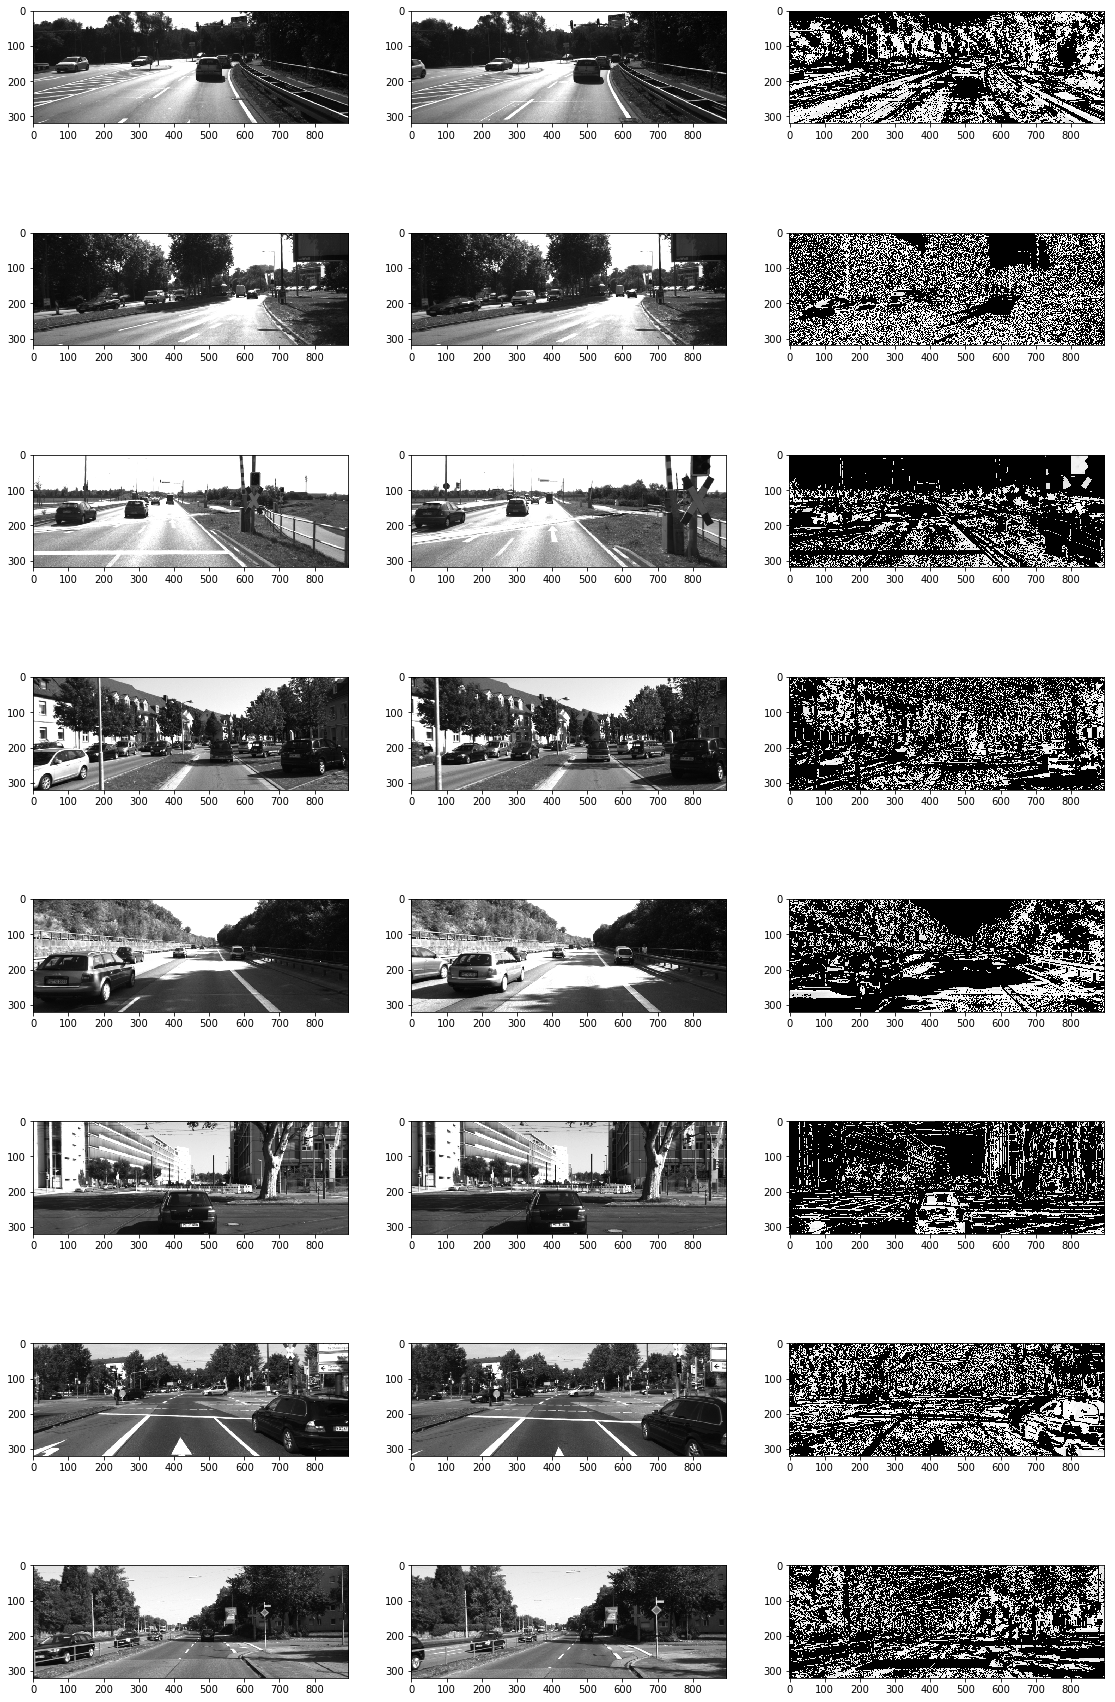

In [134]:
masked_sampled_data = add_masked_diff(sampled_data, mask_threshold=220)
show_imgs(masked_sampled_data)